In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

url_mobile = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/used_mobile_phone.csv"
url_retail = "https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/online_retail.csv"

In [2]:
df = pd.read_csv(url_mobile,  encoding= 'unicode_escape')

In [25]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,ìì´í°6íë¬ì¤ ë¸ë+ì íë¼ì´í¸ 64ê...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,ê°¤ë­ìs6ì£ì§ 32ê¸°ê° íëë¤ ì§ê±°ë...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,ê°¤ë­ìs6 íë°ì¤ë¡ íëë¤~~~ ììí...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 í°í í° ë¨ííë§¤í©ëë¤ ì§ì ...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony ìì¤íë¦¬ì c5 ultra e5506 16gb ë¯¸...,lg u 32gb,396000,lg,102.59


In [26]:
df.shape

(4951, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
create_date      4951 non-null object
price            4951 non-null float64
text             4951 non-null object
phone_model      4951 non-null object
factory_price    4951 non-null int64
maker            4951 non-null object
price_index      4951 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.8+ KB


In [65]:
df['month'] = df['create_date'].apply(lambda x: x[:7])

In [66]:
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

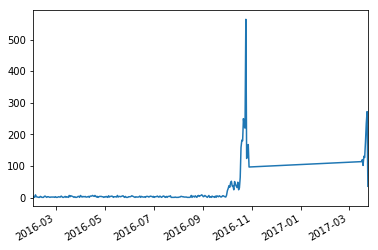

In [36]:
df_day = pd.to_datetime(df['create_date'].apply(lambda x: x[:10])).value_counts()

df_day.plot()

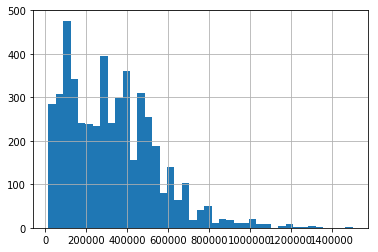

In [39]:
df['price'].hist(bins="auto")

In [45]:
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

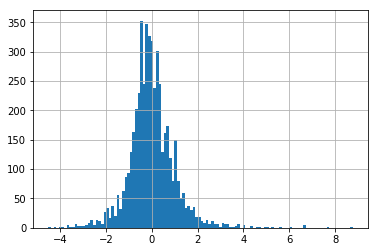

In [46]:
df_price_model_z_score = (df['price']-df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins='auto')

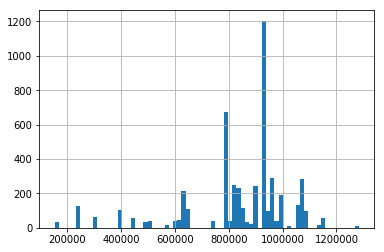

In [47]:
df['factory_price'].hist(bins='auto')

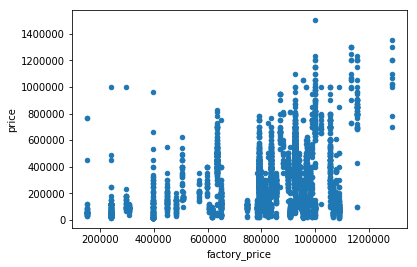

In [67]:
df.plot.scatter(x='factory_price', y='price')

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


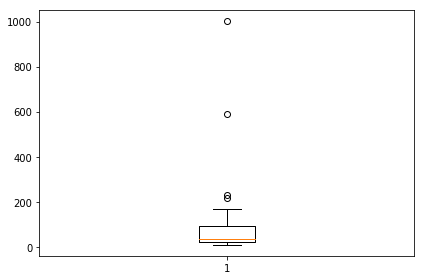

In [54]:
model_counts = df['phone_model'].value_counts()
print(model_counts.describe())

plt.boxplot(model_counts)
plt.tight_layout()

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x125d39828>,
 'caps': [<matplotlib.lines.Line2D at 0x125d39eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x125d396d8>],
 'medians': [<matplotlib.lines.Line2D at 0x125d43588>],
 'fliers': [<matplotlib.lines.Line2D at 0x125d438d0>],
 'means': []}

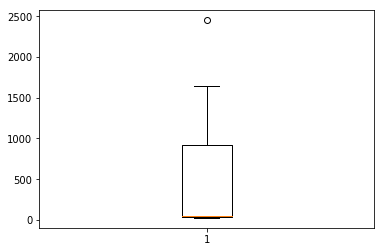

In [55]:
maker_counts = df['maker'].value_counts()
print(maker_counts)
plt.boxplot(maker_counts)

In [68]:
df['price_index'].value_counts()

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

In [69]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,ìì´í°6íë¬ì¤ ë¸ë+ì íë¼ì´í¸ 64ê...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,ê°¤ë­ìs6ì£ì§ 32ê¸°ê° íëë¤ ì§ê±°ë...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,ê°¤ë­ìs6 íë°ì¤ë¡ íëë¤~~~ ììí...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 í°í í° ë¨ííë§¤í©ëë¤ ì§ì ...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony ìì¤íë¦¬ì c5 ultra e5506 16gb ë¯¸...,lg u 32gb,396000,lg,102.59,2016-04


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [71]:
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])

X = df.loc[:, df.columns != 'price']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
X.head()

,factory_price,price_index,phone_model_g pro2 32gb,phone_model_g3 cat.6 32gb,phone_model_g4 32gb,phone_model_galaxy a7 2016 16gb,phone_model_galaxy a8 2016 32gb,phone_model_galaxy alpha 32gb,phone_model_galaxy folder 8gb,phone_model_galaxy grand max 16gb,...,month_2016-02,month_2016-03,month_2016-04,month_2016-05,month_2016-06,month_2016-07,month_2016-08,month_2016-09,month_2016-10,month_2017-03
0,924000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,979000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,854000,103.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,836000,95.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,396000,102.59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3465, 84)
(1486, 84)
(3465,)
(1486,)


In [76]:
# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10627162387.694, test: 13886147955.027
R^2 train: 0.781, test: 0.682


[('factory_price', 0.4062716064589368),
 ('maker_apple', 0.2971733450401479),
 ('phone_model_galaxy s3 3g 8gb', 0.022122584024165594),
 ('phone_model_iphone se 64gb', 0.021588832022782257),
 ('price_index', 0.021218876330203227),
 ('phone_model_galaxy s4 32gb', 0.016972143293442193),
 ('month_2017-03', 0.014807579767744543),
 ('maker_samsung', 0.014131910788372738),
 ('phone_model_galaxy s6 32gb', 0.012306028480877957),
 ('month_2016-05', 0.01082298262066187)]

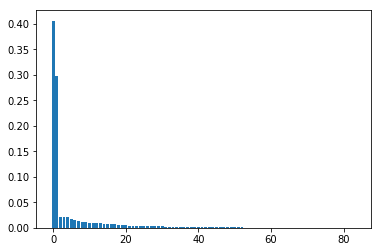

In [80]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))

sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

In [81]:
# month 피처 중, 영향력이 높은순으로 정렬하여 출력합니다.
for sorted_feature in sorted(feature, key=lambda tup: tup[1], reverse=True):
    if "month" in sorted_feature[0]: 
        print(sorted_feature)

('month_2017-03', 0.014807579767744543)
('month_2016-05', 0.01082298262066187)
('month_2016-09', 0.008228782262367555)
('month_2016-04', 0.007585215381072942)
('month_2016-10', 0.006456620696168986)
('month_2016-06', 0.004281555614228022)
('month_2016-08', 0.0035584872970172614)
('month_2016-07', 0.002702637408963576)
('month_2016-03', 0.0022701685445948886)
('month_2016-02', 0.0011003544437788487)


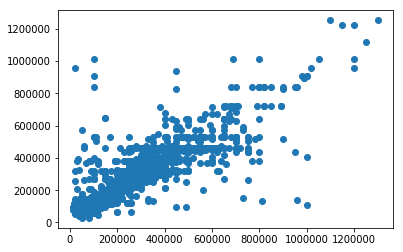

In [82]:
plt.scatter(y_test.values, y_test_pred)

In [3]:
# step2. feature engineering

In [4]:
df = pd.read_csv(url_mobile,  encoding= 'unicode_escape')

In [5]:
from datetime import datetime
import time

# create_date 피처를 수치적으로 계산하기 위해, unixtime으로 변환하는 함수를 정의합니다.
def date_to_unixtime(date_str):
    timestamp = time.mktime(datetime.strptime(date_str, '%Y-%m-%d').timetuple())
    return timestamp

# create_date 피처를 ‘현재와 얼마나 가까운 데이터인 지’ 판단하기 위한 점수를 생성합니다. 먼저 unixtime으로 데이터를 변환합니다.
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))
print(df['create_unixtime'][:10])

0    1.489849e+09
1    1.477408e+09
2    1.477321e+09
3    1.490195e+09
4    1.460300e+09
5    1.490108e+09
6    1.490195e+09
7    1.475766e+09
8    1.490368e+09
9    1.458659e+09
Name: create_unixtime, dtype: float64


In [13]:
# 변환된 unixtime에 min-max 스케일링을 적용합니다.
df['create_time_score'] = (df['create_unixtime'] - df['create_unixtime'].min()) / \
                          (df['create_unixtime'].max() - df['create_unixtime'].min())

df[['create_date', 'create_unixtime', 'create_time_score']].head()

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


In [19]:
# phone_model 피처에서 저장 용량(phone_model_storage) 피처를 추출합니다.
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split(" ")[-1])

# phone_model 피처에서 기종 세부명(phone_model_detail) 피처를 추출합니다.
df['phone_model_detail'] = df['phone_model'].apply(lambda x: ' '.join(x.split(" ")[:-1]))
df[['phone_model_storage', 'phone_model_detail']].head()

,phone_model_storage,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


In [30]:
# phone_model 피처의 기종별 거래 데이터 개수를 집계합니다.
model_counts = df['phone_model'].value_counts()

# phone_model_detail 피처의 기종별 거래 데이터 개수를 집계합니다.
model_detail_counts = df['phone_model_detail'].value_counts()
data = [model_counts, model_detail_counts]

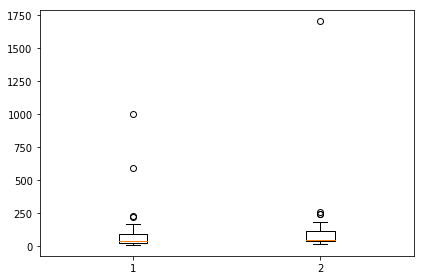

In [41]:
# 두 피처간의 기종별 거래 데이터 개수를 비교합니다.
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)
plt.tight_layout()

In [56]:
# 기종명 + 용량으로 출고가를 찾기 위한 딕셔너리를 생성합니다.
model_to_factory_price_dict = {}
for index, row in df.iterrows():
    model_concat = (row['phone_model_detail'], row['phone_model_storage'])
    if model_concat in model_to_factory_price_dict:
        pass
    else:
        model_to_factory_price_dict[model_concat] = row['factory_price']

print(str(model_to_factory_price_dict)[:40], "...")

{('iphone 6', '64gb'): 924000, ('galaxy  ...


In [53]:
str(model_to_factory_price_dict)[:70]

"{('iphone 6', '64gb'): 924000, ('galaxy s6 edge', '32gb'): 979000, ('g"

-1.3966616903783426
1.666982156397844


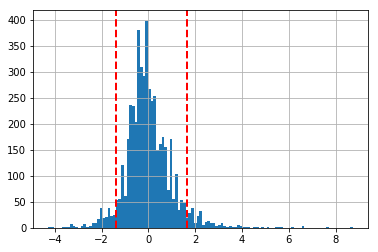

In [57]:
# 거래 가격(price)의 z-score를 계산합니다. 이는 해당 데이터의 가격이 기종의 평균에 비해 어느정도로 높거나 낮은지를 알 수 있게 하는 점수입니다.
df['price_by_group'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())

# 거래 가격의 z-score(price_by_group)의 분포를 그래프로 출력합니다
ax = df['price_by_group'].hist(bins="auto")

# z-score(price_by_group) 기준으로 하위 5%, 상위 5%에 해당하는 점수를 lower_bound, upper_bound 라고 지정합니다.
lower_bound = df['price_by_group'].quantile(0.05)
upper_bound = df['price_by_group'].quantile(0.95)

# lower_bound, upper_bound 그래프에 추가합니다.
ax.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)

# lower_bound를, upper_bound 출력합니다.
print(lower_bound)
print(upper_bound)

In [58]:
 # lower_bound보다 낮으면 0, upper_bound보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류하는 함수를 정의합니다.
def get_price_level(price, lower, upper):
    if price <= lower:
        return "0"
    elif price >= upper:
        return "2"
    else:
        return "1"

# lower_bound보다 낮으면 0, upper_bound보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류합니다.
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x: x.quantile(0.95))

df['price_level'] = df.apply(lambda row: get_price_level(row['price'], row['price_lower'], 
                                                         row['price_upper']), axis=1)

df[['price', 'price_lower', 'price_upper', 'price_level', 'text']].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,680000.0,1,ìì´í°6íë¬ì¤ ë¸ë+ì íë¼ì´í¸ 64ê...
1,380000.0,180000.0,414000.0,1,ê°¤ë­ìs6ì£ì§ 32ê¸°ê° íëë¤ ì§ê±°ë...
2,300000.0,150000.0,349000.0,1,ê°¤ë­ìs6 íë°ì¤ë¡ íëë¤~~~ ììí...
3,290000.0,100000.0,500000.0,1,sk g5 í°í í° ë¨ííë§¤í©ëë¤ ì§ì ...
4,280000.0,18000.0,400000.0,1,sony ìì¤íë¦¬ì c5 ultra e5506 16gb ë¯¸...


In [60]:
import pickle
import re

# 중고나라 불용어 사전을 불러옵니다.
with open('../data/used_mobile_phone_stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

# 불용어 사전에 등록된 단어 10개를 출력합니다.
print(stopwords[:10])

FileNotFoundError: [Errno 2] No such file or directory: '../data/used_mobile_phone_stopwords.pkl'